# IMPORT PYTHON LIBRARIES

In [241]:
import sys
import path
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from scipy.special import logsumexp
from fancyimpute import IterativeImputer
from fancyimpute import KNN 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from collections import Counter
from numpy import genfromtxt
import missingno as msno
%matplotlib inline
import seaborn
from plotnine import *
from plotnine import ggplot, aes, geom_line

# FUNCTION #1 check the status of the file

In [242]:
def is_fileExists(filename):
    if path.isfile(filename):
        return True
    else:
        return False
    

# FUNCTION #2 Read the file

In [243]:
def read_csv(filename):
    try:
        if (is_fileExists):
            fileHandler=pd.read_csv(filename)
            return fileHandler
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #3 Get column Names

In [212]:
def get_columnNames(filePd):
    try:
        return (filePd.columns.tolist())
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #4 Missing Series

In [244]:
def found_missing_series(fileHandler):
    try:
        dic_out = {}
        fileHandler.isna().sum()
        result=fileHandler.isna().sum()
        resultToDict=result.to_dict()
        for x, y in resultToDict.items():
            if y != 0:
                dic_out[x] = y
        result_series = pd.Series(dic_out) 
        return result_series
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #5 Impute missing value by MICE


In [245]:
def impute_data_mice(filePd,column_names):
    try:
        mice_imputer = IterativeImputer()
        arr = mice_imputer.fit_transform(filePd) 
        filePd = pd.DataFrame(arr, columns =column_names)
        return filePd
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #6 Ordinal Encoder

In [246]:
from sklearn.preprocessing import OrdinalEncoder
def ordinalEncoder(filePd,column_names):
    try:
        d1 = filePd.copy()
        encoder = OrdinalEncoder()
        d1 = encoder.fit_transform(d1)
        return d1
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #7 label Encoder

In [247]:
from sklearn import preprocessing
def labelEncoder(filePd,column_names):
    try:
        d1 = filePd.copy()
        for i in column_names:
            le = preprocessing.LabelEncoder()
        d1[i] = le.fit_transform(d1[i])
        return d1
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #8 MinMaxScaler

In [248]:
from sklearn.preprocessing import MinMaxScaler
def minMaxScaler(filePd):
    try:
        scaler = MinMaxScaler()
        scaledData = scaler.fit_transform(filePd)
        scaledData = pd.DataFrame(scaledData, columns=filePd.columns)
        return scaledData
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #9 Roboust Scaler

In [249]:
from sklearn.preprocessing import RobustScaler
def robustScaler(filePd):
    try:
        scaler = RobustScaler()
        scaledData = scaler.fit_transform(filePd)
        scaledData = pd.DataFrame(scaledData, columns=filePd.columns)
        return scaledData
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #10 Standard Scaler

In [250]:
from sklearn.preprocessing import StandardScaler
def standardScaler(filePd):
    try:
        scaler = StandardScaler()
        scaledData = scaler.fit_transform(filePd)
        scaledData = pd.DataFrame(scaledData, columns=filePd.columns)
        return scaledData
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #11 visualize Outlier

In [251]:
def visualizeOutlier(col_name1,title1):
    try:
        
        sns.boxplot(col_name1).set_title(title1)
        plt.show()
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

## FUNCTION #12 Detect Outlier-Zscore outlier

In [252]:
def zScoreOutlier(filePd):
    try:
        
        zScore = np.abs(stats.zscore(filePd))
        print(np.where(zScore > 3))
        outlierData = data[(zScore < 3).all(axis=1)]

        return outlierData
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #13 Detect Outlier-IQR outlier

In [253]:
def IQROutlier(filePd):
    try:
        
        quantile1 = data.quantile(0.25)
        quantile3 = data.quantile(0.75)
        IQR = quantile3 - quantile1
        print(IQR)
        outlierData = filePd[~((filePd < (quantile1 - 1.5 * IQR)) | (data > (quantile3 + 1.5 * IQR))).any(axis=1)]
        outlierData.shape
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

#### FUNCTION #14 Detect Outlier-DBSCAN

In [254]:
def DBScanOutlier(filePd): 
    try:
        
        d1 = data.copy()
        

        scaler = MinMaxScaler()
        d2 = scaler.fit_transform(d1)
        d2 = pd.DataFrame(d2, columns=d1.columns)

        self.findDBScanEPS(d2, 5)

        db = DBSCAN(eps=0.5, min_samples=5).fit(d2)
        
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# FUNCTION #15 GG PLOT

In [255]:
def gg_plot(filePd, numericCols, categoricalCols, response='TenYearCHD'):
    try:
        for i in numericCols:
            for j in categoricalCols:
                print(ggplot(filePd)+ aes(x=j, y=i) +
                   scale_color_brewer(type='diverging', palette=4) +
                       geom_bar(position_dodge()))
                      
    except Exception as err:
        exc_type, exc_obj, exc_tb = sys.exc_info()
        sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
        sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
        sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))


# FUNCTION #16 SNS PLOT

In [256]:
def snsPlot(filePd, numericCols, categoricalCols, response='TenYearCHD'):
        try:

            selectedCols = []
            hueCols = []
            Cols = []



           
            
            for i in numericCols:
                for j in categoricalCols:
                    sns.catplot(x=j, y=i, hue=response,   filePd=filePd, kind='bar')
                    
            
            for i in range(len(numericCols)):
                for j in range(len(numericCols)-1):
                    sns.scatterplot(filePd=filePd, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full")
                    plt.show()
                   
               
            
                for i in numericCols:
                    for j in [response]:
                        plt.figure(figsize=(15, 7))
                        plt.subplot(121)
                        graph = sns.countplot(y=filePd[i],
                                              palette="Set2",
                                              order=filePd[i].value_counts().index[:500])
                        plt.title("Distribution of " + i)
                    
                    
                sns.countplot(y=filePd['age'], palette="Set2", hue=filePd[response],
                                          order=filePd['age'].value_counts().index[:200])
            
            for i in categoricalCols:
                for j in [response]:
                        plt.figure(figsize=(15, 7))
                        plt.subplot(121)
                        graph = sns.countplot(y=filePd[i],
                                              palette="Set2",
                                              order=filePd[i].value_counts().index[:100])
                        plt.title("Distribution of " + i)

                        plt.subplot(122)
                        sns.countplot(y=filePd[i],
                                      hue=filePd[j], palette="Set2",
                                      order=filePd[i].value_counts().index[:100])
                        plt.ylabel("")
                        plt.title("Distribution of " + i + " by " + j)

                        plt.subplots_adjust(wspace=.4)
                    
                        snsPlot.percentageDistribution(data, i, response)
        except Exception as err:
            exc_type, exc_obj, exc_tb = sys.exc_info()
            sys.stderr.write("ERRORED DESC\t::%s:\n"% str(err))
            sys.stderr.write("ERRORED MODULE\t::%s:\n"%str(exc_type))
            sys.stderr.write("ERRORED LINE\t::%s:\n"%str(exc_tb.tb_lineno))

# # FUNCTION #16 SCATTER PLOT

In [257]:
def scatter_plot(data,numericCols,response='TenYearCHD'):
    for i in range(len(numericCols)):
                for j in range(len(numericCols)-1):
                    #sns.jointplot(x=response, y=i, data=data)
                    sns.scatterplot(data=data, x=numericCols[i], y=numericCols[j+1], palette="deep", legend="full",
                                    hue=data[response].tolist())
                    #ax.legend(title=response)  # add a title to the legend
                    plt.show()

# MAIN PROGRAM

In [258]:
file_name = "Heart Disease.csv"
pd_file=read_csv(file_name)
pd_file.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [259]:
column_names = get_columnNames(pd_file)
missing_values=found_missing_series(pd_file)
pd_file=impute_data_mice(pd_file,column_names)
missing_values=found_missing_series(pd_file)
print("Missing values after mice_imputer:::",missing_values)

Missing values after mice_imputer::: Series([], dtype: float64)


<ipython-input-244-064e92e08bc0>:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


In [260]:
OE=ordinalEncoder(pd_file,column_names)
print("ordinal Encoder:::",OE)

ordinal Encoder::: [[  1.   7. 108. ...  36. 108.   0.]
 [  0.  14.  56. ...  51.  62.   0.]
 [  1.  16.   0. ...  30.  25.   0.]
 ...
 [  0.  16.  56. ...  40. 415.   0.]
 [  0.  12.   0. ...  42. 135.   0.]
 [  0.  20.  56. ...  36. 446.   0.]]


In [261]:
EL=labelEncoder(pd_file,column_names)
print("label Encoder:::",EL)

label Encoder:::       male   age  education  currentSmoker  cigsPerDay    BPMeds  \
0      1.0  39.0        4.0            0.0         0.0  0.000000   
1      0.0  46.0        2.0            0.0         0.0  0.000000   
2      1.0  48.0        1.0            1.0        20.0  0.000000   
3      0.0  61.0        3.0            1.0        30.0  0.000000   
4      0.0  46.0        3.0            1.0        23.0  0.000000   
...    ...   ...        ...            ...         ...       ...   
4233   1.0  50.0        1.0            1.0         1.0  0.000000   
4234   1.0  51.0        3.0            1.0        43.0  0.000000   
4235   0.0  48.0        2.0            1.0        20.0  0.013617   
4236   0.0  44.0        1.0            1.0        15.0  0.000000   
4237   0.0  52.0        2.0            0.0         0.0  0.000000   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                 0.0           0.0       0.0    195.0  106.0   70.0  26.97   
1       

In [262]:
Scaled_Data=minMaxScaler(pd_file)
print("Scaled Data using Min Max Scaler:::",Scaled_Data)

Scaled Data using Min Max Scaler:::       male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0      1.0  0.184211   1.000000            0.0    0.000000  0.028401   
1      0.0  0.368421   0.333333            0.0    0.000000  0.028401   
2      1.0  0.421053   0.000000            1.0    0.285714  0.028401   
3      0.0  0.763158   0.666667            1.0    0.428571  0.028401   
4      0.0  0.368421   0.666667            1.0    0.328571  0.028401   
...    ...       ...        ...            ...         ...       ...   
4233   1.0  0.473684   0.000000            1.0    0.014286  0.028401   
4234   1.0  0.500000   0.666667            1.0    0.614286  0.028401   
4235   0.0  0.421053   0.333333            1.0    0.285714  0.041631   
4236   0.0  0.315789   0.000000            1.0    0.214286  0.028401   
4237   0.0  0.526316   0.333333            0.0    0.000000  0.028401   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                 0.

In [263]:
Scaled_Data1=robustScaler(pd_file)
print("Scaled Data using Roboust Scaler:::",Scaled_Data1)

Scaled Data using Roboust Scaler:::       male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0      1.0 -0.714286        1.0            0.0        0.00  0.000000   
1      0.0 -0.214286        0.0            0.0        0.00  0.000000   
2      1.0 -0.071429       -0.5            1.0        1.00  0.000000   
3      0.0  0.857143        0.5            1.0        1.50  0.000000   
4      0.0 -0.214286        0.5            1.0        1.15  0.000000   
...    ...       ...        ...            ...         ...       ...   
4233   1.0  0.071429       -0.5            1.0        0.05  0.000000   
4234   1.0  0.142857        0.5            1.0        2.15  0.000000   
4235   0.0 -0.071429        0.0            1.0        1.00  0.013617   
4236   0.0 -0.357143       -0.5            1.0        0.75  0.000000   
4237   0.0  0.214286        0.0            0.0        0.00  0.000000   

      prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                 0.

In [264]:
Scaled_Data2=standardScaler(pd_file)
print("Scaled Data using Standard Scaler:::",Scaled_Data2)

Scaled Data using Standard Scaler:::           male       age  education  currentSmoker  cigsPerDay    BPMeds  \
0     1.153192 -1.234951   2.006307      -0.988271   -0.761590 -0.176943   
1    -0.867158 -0.418257   0.021427      -0.988271   -0.761590 -0.176943   
2     1.153192 -0.184916  -0.971013       1.011868    0.918755 -0.176943   
3    -0.867158  1.331800   1.013867       1.011868    1.758928 -0.176943   
4    -0.867158 -0.418257   1.013867       1.011868    1.170807 -0.176943   
...        ...       ...        ...            ...         ...       ...   
4233  1.153192  0.048425  -0.971013       1.011868   -0.677573 -0.176943   
4234  1.153192  0.165095   1.013867       1.011868    2.851152 -0.176943   
4235 -0.867158 -0.184916   0.021427       1.011868    0.918755 -0.096200   
4236 -0.867158 -0.651598  -0.971013       1.011868    0.498669 -0.176943   
4237 -0.867158  0.281766   0.021427      -0.988271   -0.761590 -0.176943   

      prevalentStroke  prevalentHyp  diabetes   to

The column names are ::::::::::::::::::::: male


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


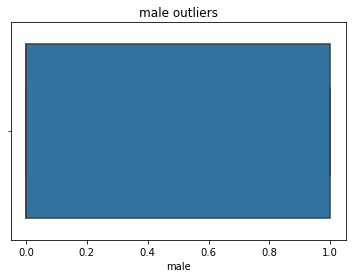

The column names are ::::::::::::::::::::: age


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


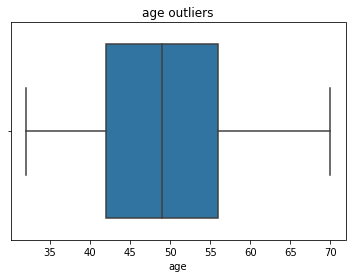

The column names are ::::::::::::::::::::: education


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


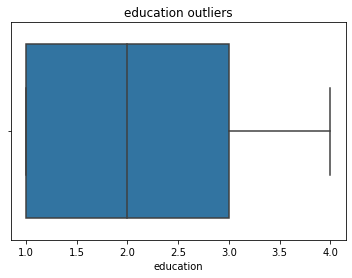

The column names are ::::::::::::::::::::: currentSmoker


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


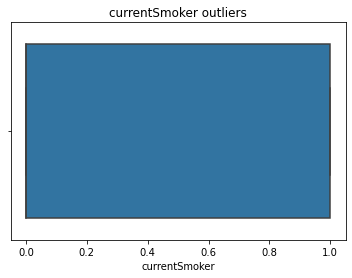

The column names are ::::::::::::::::::::: cigsPerDay


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


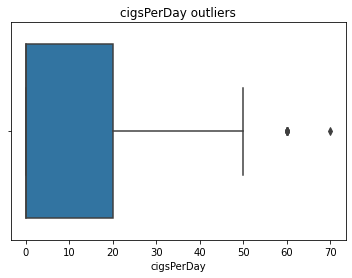

The column names are ::::::::::::::::::::: BPMeds


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


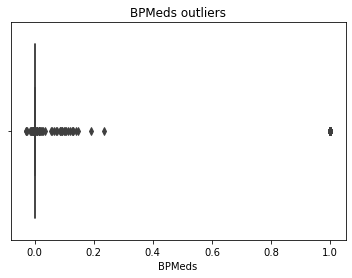

The column names are ::::::::::::::::::::: prevalentStroke


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


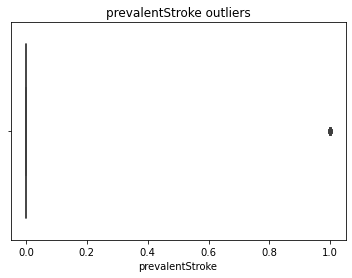

The column names are ::::::::::::::::::::: prevalentHyp


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


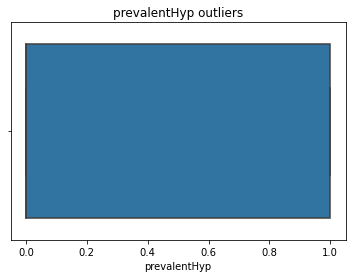

The column names are ::::::::::::::::::::: diabetes


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


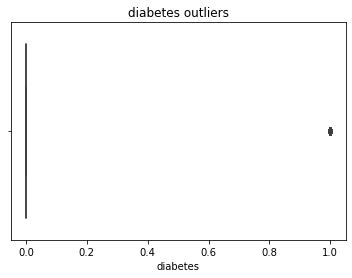

The column names are ::::::::::::::::::::: totChol


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


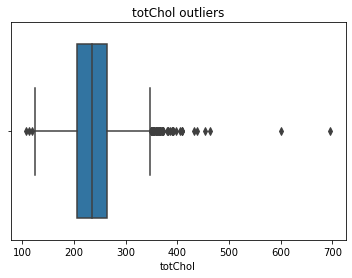

The column names are ::::::::::::::::::::: sysBP


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


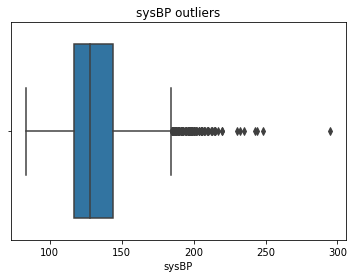

The column names are ::::::::::::::::::::: diaBP


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


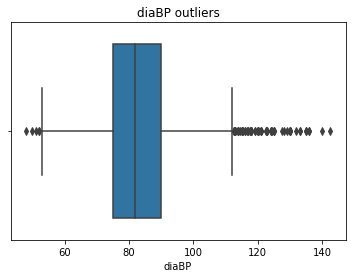

The column names are ::::::::::::::::::::: BMI


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


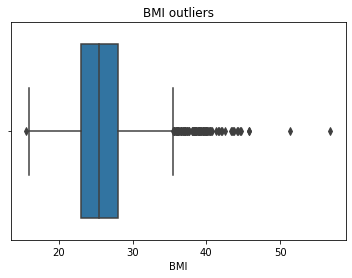

The column names are ::::::::::::::::::::: heartRate


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


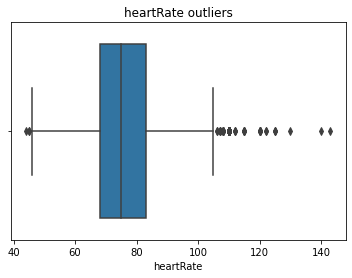

The column names are ::::::::::::::::::::: glucose


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


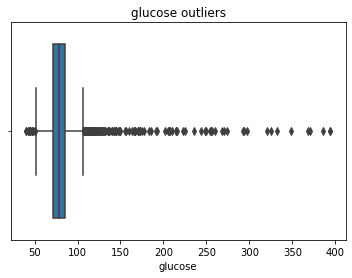

The column names are ::::::::::::::::::::: TenYearCHD


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


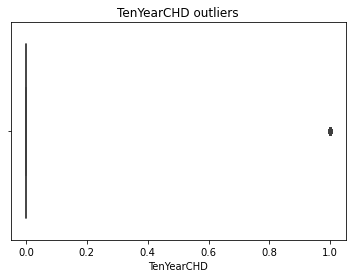

In [265]:
for col_name in column_names:
     print("The column names are :::::::::::::::::::::",col_name)
     title = col_name+" outliers"
     visualizeOutlier(pd_file[col_name], title)
  

In [266]:
Outler1=zScoreOutlier(pd_file)

ERRORED DESC	::name 'stats' is not defined:
ERRORED MODULE	::<class 'NameError'>:
ERRORED LINE	::4:


In [267]:
numericCols = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
categoricalCols = ['education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
pd_file.dtypes


male               float64
age                float64
education          float64
currentSmoker      float64
cigsPerDay         float64
BPMeds             float64
prevalentStroke    float64
prevalentHyp       float64
diabetes           float64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD         float64
dtype: object

In [268]:
gg_plot(pd_file, numericCols, categoricalCols)

ERRORED DESC	::Unknown argument type <class 'plotnine.positions.position_dodge.position_dodge'>, expected mapping/aes.:
ERRORED MODULE	::<class 'TypeError'>:
ERRORED LINE	::7:


In [269]:

snsPlot(pd_file, numericCols, categoricalCols)

ERRORED DESC	::Could not interpret input 'education':
ERRORED MODULE	::<class 'ValueError'>:
ERRORED LINE	::15:


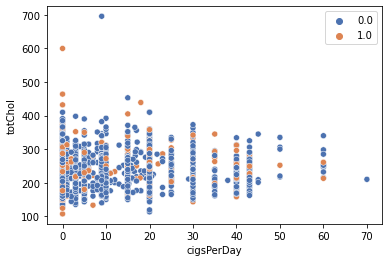

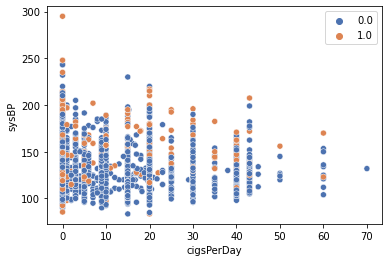

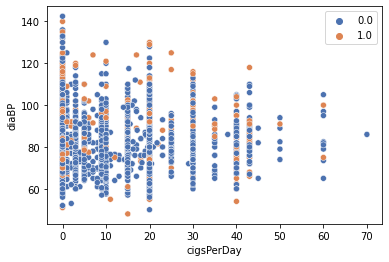

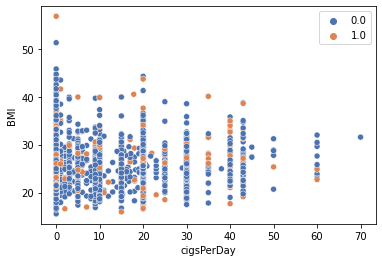

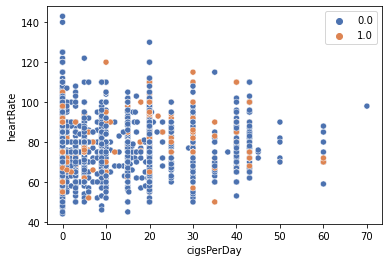

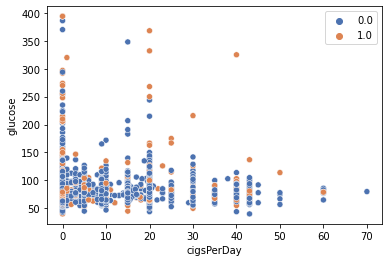

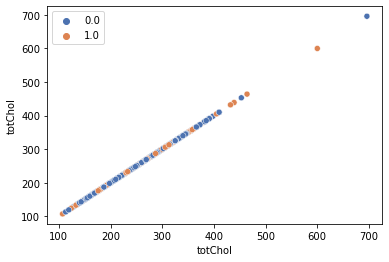

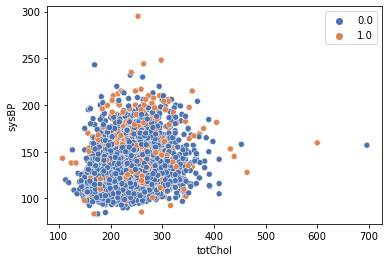

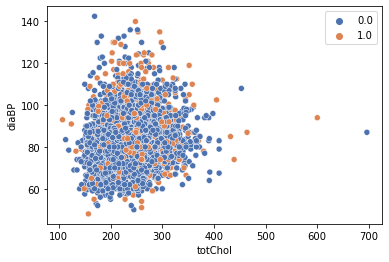

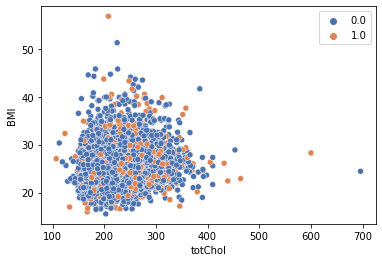

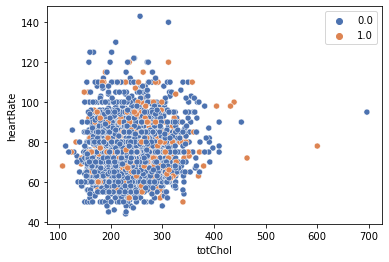

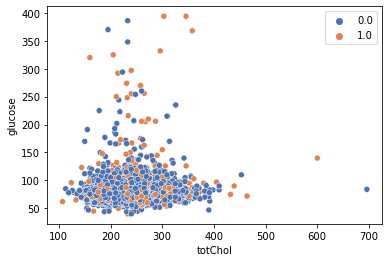

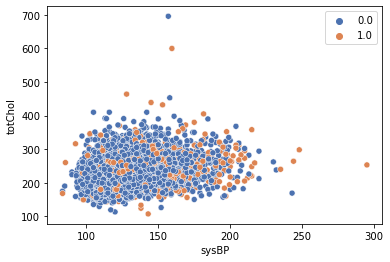

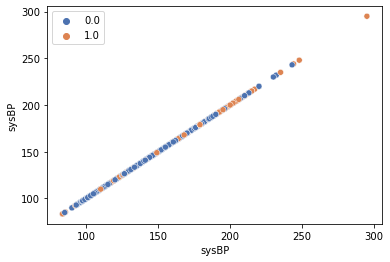

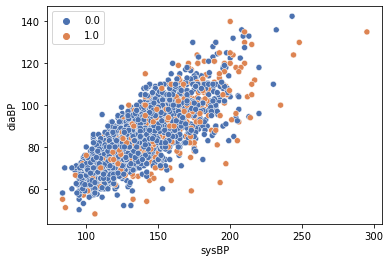

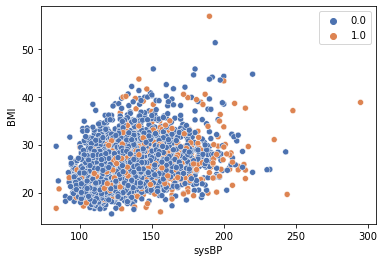

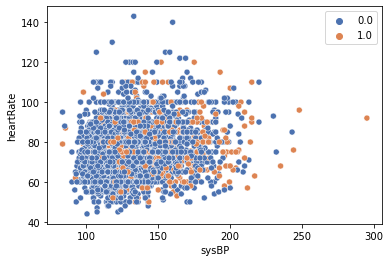

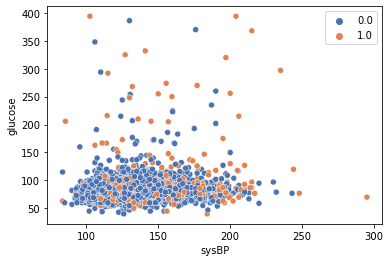

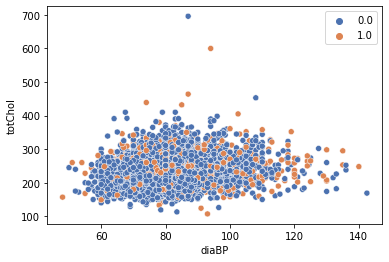

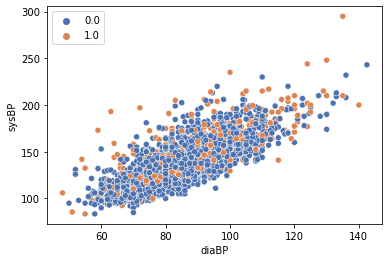

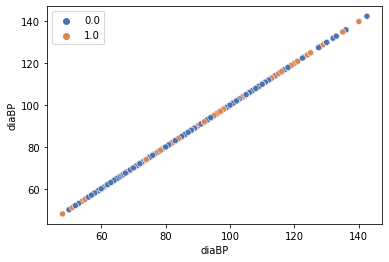

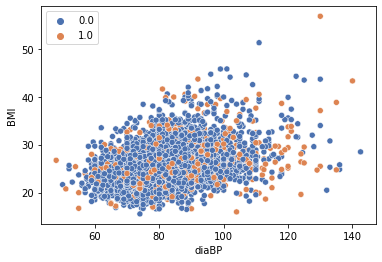

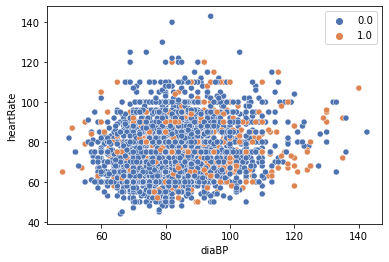

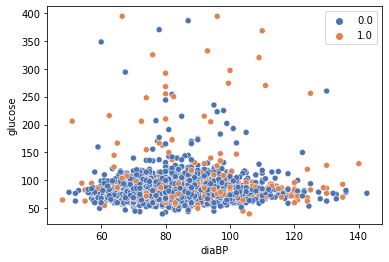

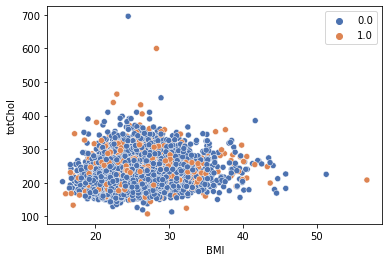

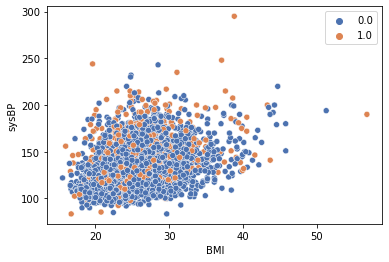

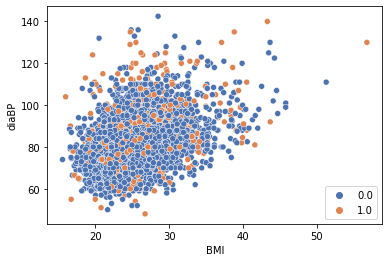

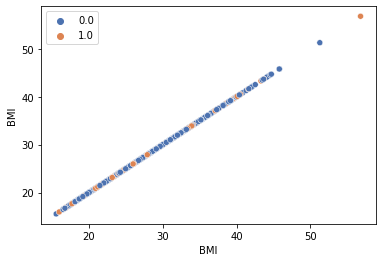

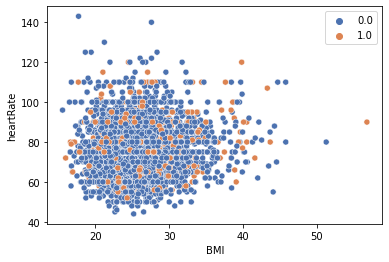

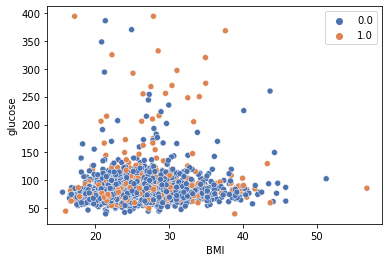

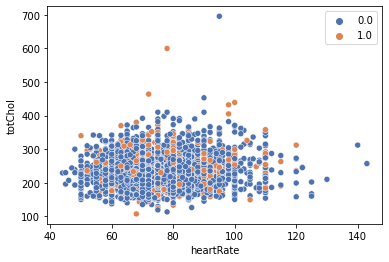

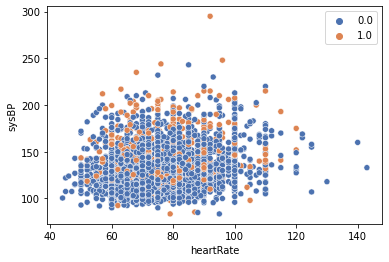

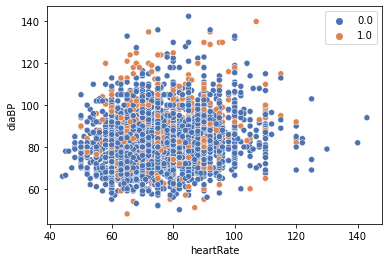

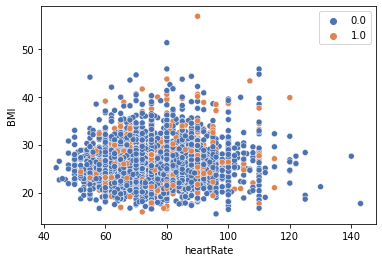

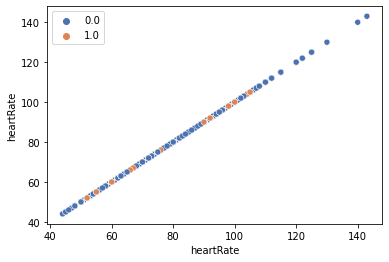

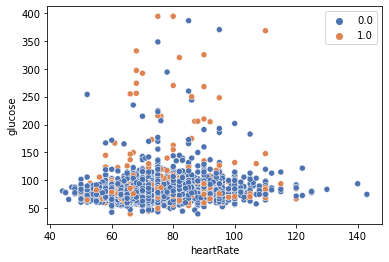

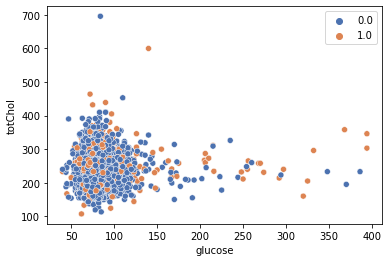

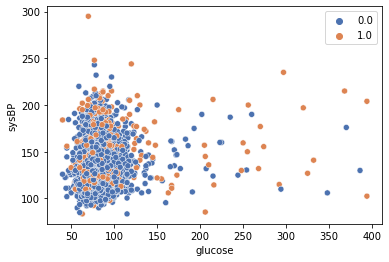

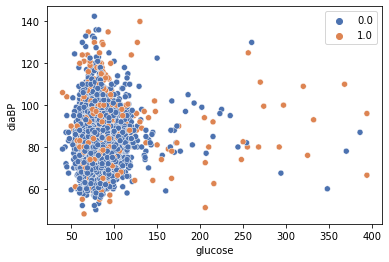

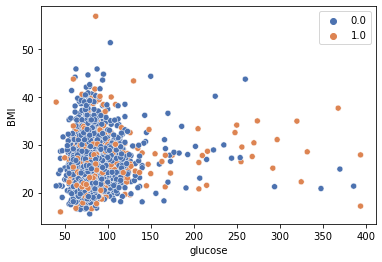

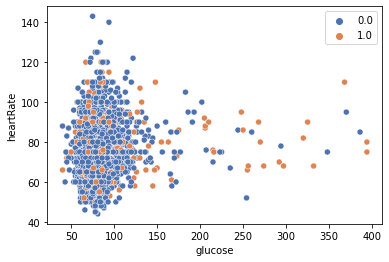

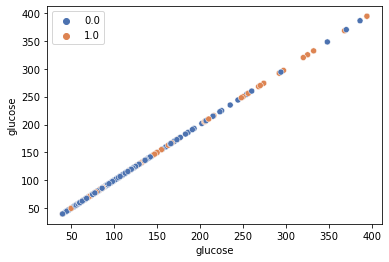

In [270]:
scatter_plot(pd_file,numericCols)